#### Logistice Regression Model

We did split data into test and test before we go Random Oversampling and Random undersampling 

In [15]:
## Import Dependencies
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress Deprecation Warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


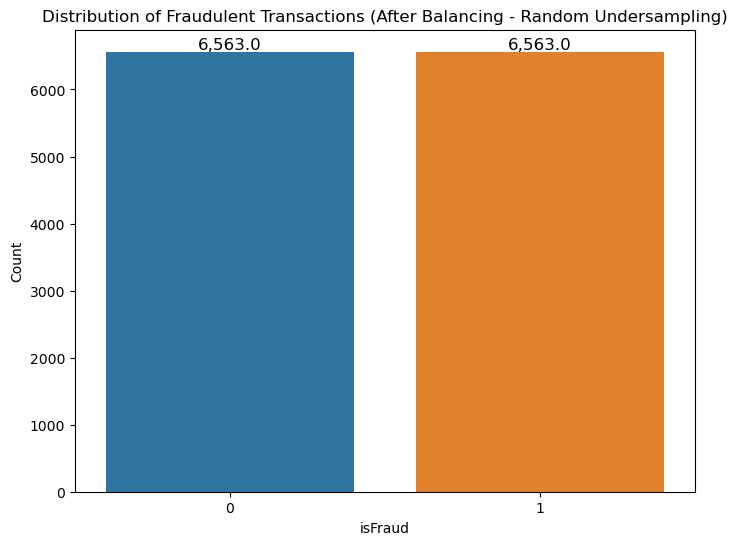

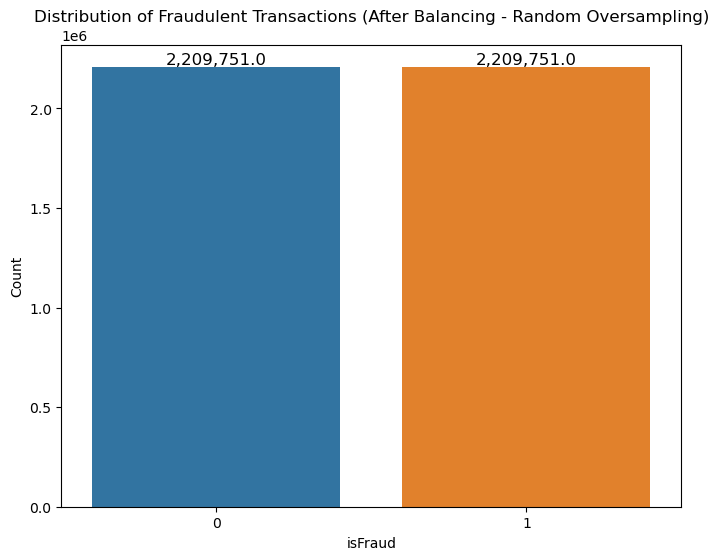

In [5]:
# Assuming you've already prepared the data (choose one of the options: CSV, Digitized DataFrame, or Raw DataFrame)
# For example, using the raw DataFrame `fraud_det_dig_df`
fraud_df = pd.read_csv("../5.Resources/fraud_det_dig_df.csv")

# Separate features and target variable
X = fraud_df.drop('isFraud', axis=1)
y = fraud_df['isFraud']

# Perform train-test split on the original DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Visualize the distribution of 'isFraud' after balancing (Random Undersampling)
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=pd.DataFrame({'isFraud': y_rus}), x='isFraud')

for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Distribution of Fraudulent Transactions (After Balancing - Random Undersampling)")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.show()

# Perform Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Visualize the distribution of 'isFraud' after Random Oversampling
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y_ros)

for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Distribution of Fraudulent Transactions (After Balancing - Random Oversampling)")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.show()


In [21]:
# Check the data types of columns in the DataFrame
print(fraud_df.dtypes)

# Select columns of non-numeric data types (e.g., 'object' for strings)
non_numeric_cols = fraud_df.select_dtypes(include=['object']).columns

# Drop the non-numeric columns from the DataFrame
fraud_df.drop(columns=non_numeric_cols, inplace=True)

# Separate features and target variable
X = fraud_df.drop('isFraud', axis=1)
y = fraud_df['isFraud']

# Perform train-test split on the updated DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



step                   int64
amount               float64
oldbalanceOrg        float64
newbalanceOrig       float64
oldbalanceDest       float64
newbalanceDest       float64
isFraud                int64
isFlaggedFraud         int64
hour                   int64
day                    int64
week                   int64
trans_weight         float64
bal_change_per       float64
large_transaction      int64
type_CASH_OUT          int64
type_TRANSFER          int64
Destination            int64
dtype: object


In [23]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)


c:\Users\Micah\anaconda3_1\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9970293044854615
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552445
           1       0.50      0.36      0.42      1634

    accuracy                           1.00    554079
   macro avg       0.75      0.68      0.71    554079
weighted avg       1.00      1.00      1.00    554079

Confusion Matrix:
[[551838    607]
 [  1039    595]]


In [33]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Fit the model on the training data after undersampling
logreg_model.fit(X_rus, y_rus)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the classification report as a dictionary
class_report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report dictionary into a DataFrame
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])


c:\Users\Micah\anaconda3_1\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8600524473946856
Classification Report Table:


In [36]:
## Show model performanceClassification Report Table
# Generate the classification report as a dictionary
class_report_dict = classification_report(y_test, y_pred, output_dict=True)
# Convert the classification report dictionary into a DataFrame
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Display the classification report table
print("Classification Report Table:")
class_report_df


Classification Report Table:


,precision,recall,f1-score,support
0,0.999340,0.860207,0.924568,552445.000000
1,0.016805,0.807834,0.032925,1634.000000
accuracy,0.860052,0.860052,0.860052,0.860052
macro avg,0.508072,0.834020,0.478747,554079.000000
weighted avg,0.996442,0.860052,0.921939,554079.000000


In [35]:
## Show model performance confusion matrix

print("\nConfusion Matrix DataFrame:")
conf_matrix_df


Confusion Matrix DataFrame:


,Predicted 0,Predicted 1
Actual 0,475217,77228
Actual 1,314,1320
